# 不同分类算法的差异

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import datasets

## 加载数据

In [2]:
wine =datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
from sklearn.model_selection import train_test_split
X = wine['data']
y = wine['target']

In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

## 归一化处理

In [5]:
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)

standard = StandardScaler()
X = standard.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## LR逻辑斯蒂回归模型应用

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
%%time
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    s = lr.score(X_test,y_test)
    score += s/100
print('LR逻辑回归算法多次运算平均得分是：',score)

LR逻辑回归算法多次运算平均得分是： 0.9830555555555557
CPU times: user 454 ms, sys: 7.49 ms, total: 461 ms
Wall time: 462 ms


## SVC支持向量机模型应用

In [8]:
%%time
score = 0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    model = SVC()
    model.fit(X_train,y_train)
    s = model.score(X_test,y_test)
    score += s/1000
print('SVC支持向量机多次运算平均得分是：',score)

SVC支持向量机多次运算平均得分是： 0.9822500000000058
CPU times: user 1.26 s, sys: 10 ms, total: 1.27 s
Wall time: 1.26 s


## 决策树模型应用

In [9]:
%%time
score = 0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    s = model.score(X_test,y_test)
    score += s/1000
print('决策树多次运算平均得分是：',score)

决策树多次运算平均得分是： 0.908500000000005
CPU times: user 623 ms, sys: 6.81 ms, total: 630 ms
Wall time: 628 ms


## 不同算法总结对比

决策树对数据是否归一化不敏感

逻辑回归，如果不进行归一化，准确率降低，运行时间会增加

SVC支持向量机，如果不进行归一化，准确率，大大降低

# 决策回归树示例

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

## 创建数据

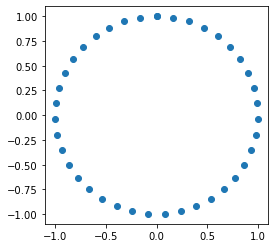

In [11]:
X_train = np.linspace(0,2 * np.pi, 40).reshape(-1,1) # 训练数据就是符合要求的二维数据
# 二维：[[样本一],[样本二],[样本三],……] 多个样本，每个样本，包含多个属性

# shape = (40,2)
# 形状：圆
y_train = np.concatenate([np.sin(X_train),np.cos(X_train)],axis = 1)

plt.figure(figsize=(4,4))
plt.scatter(y_train[:,0],y_train[:,1])

In [12]:
X_test = np.linspace(0,2 * np.pi, 256).reshape(-1,1)

## 首先使用线性回归

(256, 2)

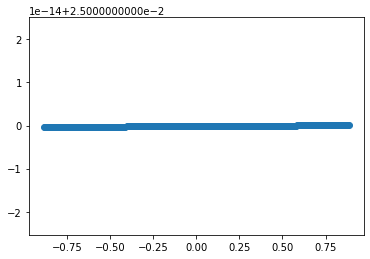

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train) # 建模

# y_pred.shape = ?
y_pred = model.predict(X_test) # 预测
display(y_pred.shape)

# 如果线性模型预测效果很好，绘制了测试数据，应该是：标准圆
plt.scatter(y_pred[:,0],y_pred[:,1])

## SVR支持向量机

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='poly')
model.fit(X_train,y_train) # 建模

# y_pred.shape = ?
y_pred = model.predict(X_test) # 预测
display(y_pred.shape)

# 如果线性模型预测效果很好，绘制了测试数据，应该是：标准圆
plt.scatter(y_pred[:,0],y_pred[:,1])

## 决策树算法

决策树深度是3

(256, 2)

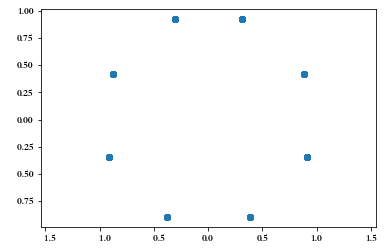

In [19]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train,y_train) # 建模

# y_pred.shape = ?
y_pred = model.predict(X_test) # 预测
display(y_pred.shape)

# 如果线性模型预测效果很好，绘制了测试数据，应该是：标准圆
plt.scatter(y_pred[:,0],y_pred[:,1])
_ = plt.axis('equal') # axis轴，equal 相等（横纵坐标刻度值相等）

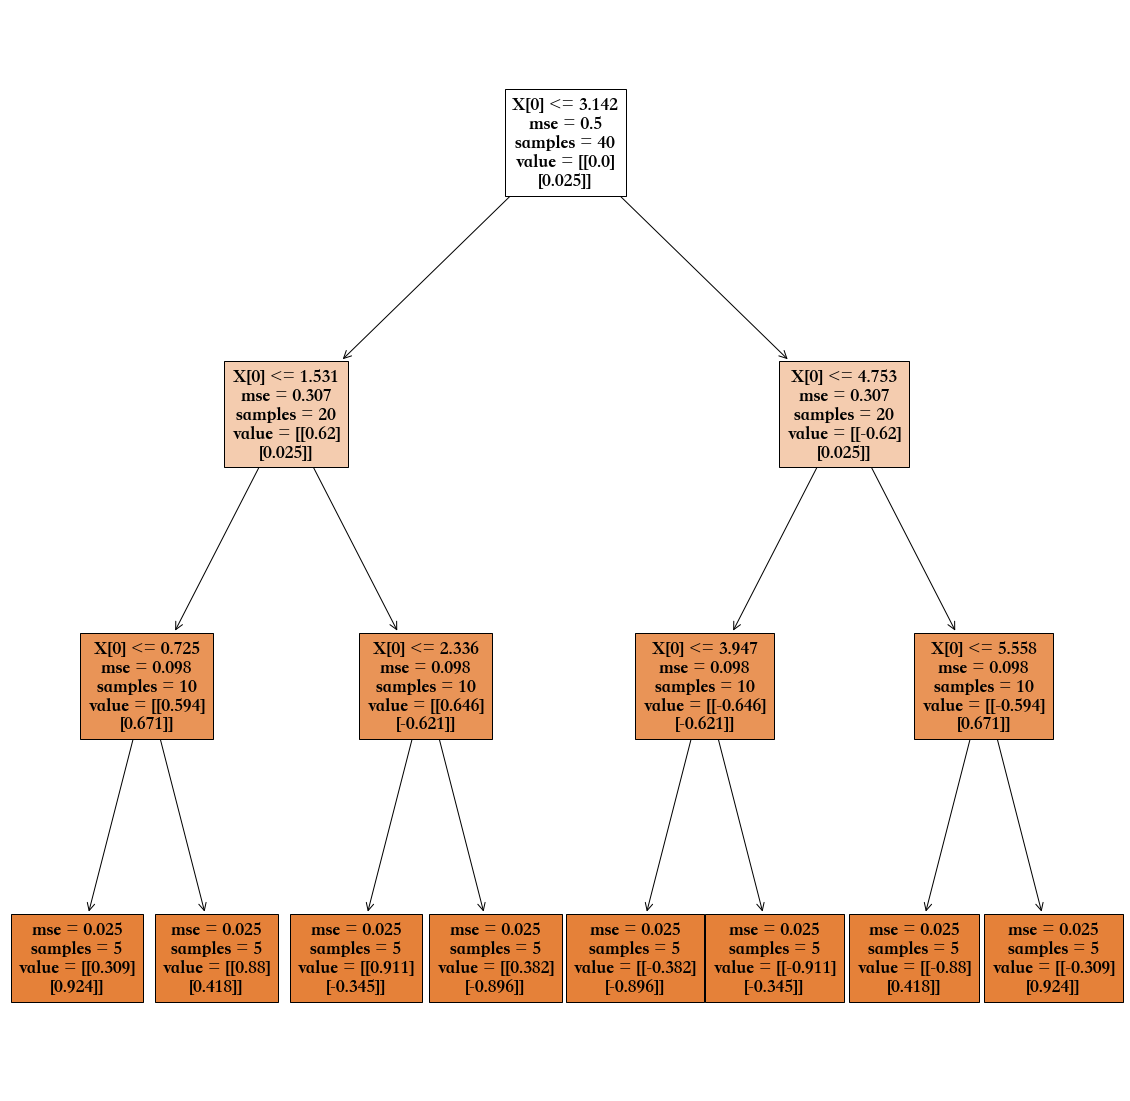

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Songti SC'
plt.figure(figsize=(20,20))

_ = tree.plot_tree(model,filled=True)

决策树深度是4

(256, 2)

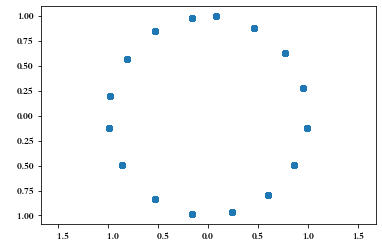

In [21]:
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train,y_train) # 建模
# y_pred.shape = ?
y_pred = model.predict(X_test) # 预测
display(y_pred.shape)
# 如果线性模型预测效果很好，绘制了测试数据，应该是：标准圆
plt.scatter(y_pred[:,0],y_pred[:,1])
_ = plt.axis('equal') # axis轴，equal 相等（横纵坐标刻度值相等）

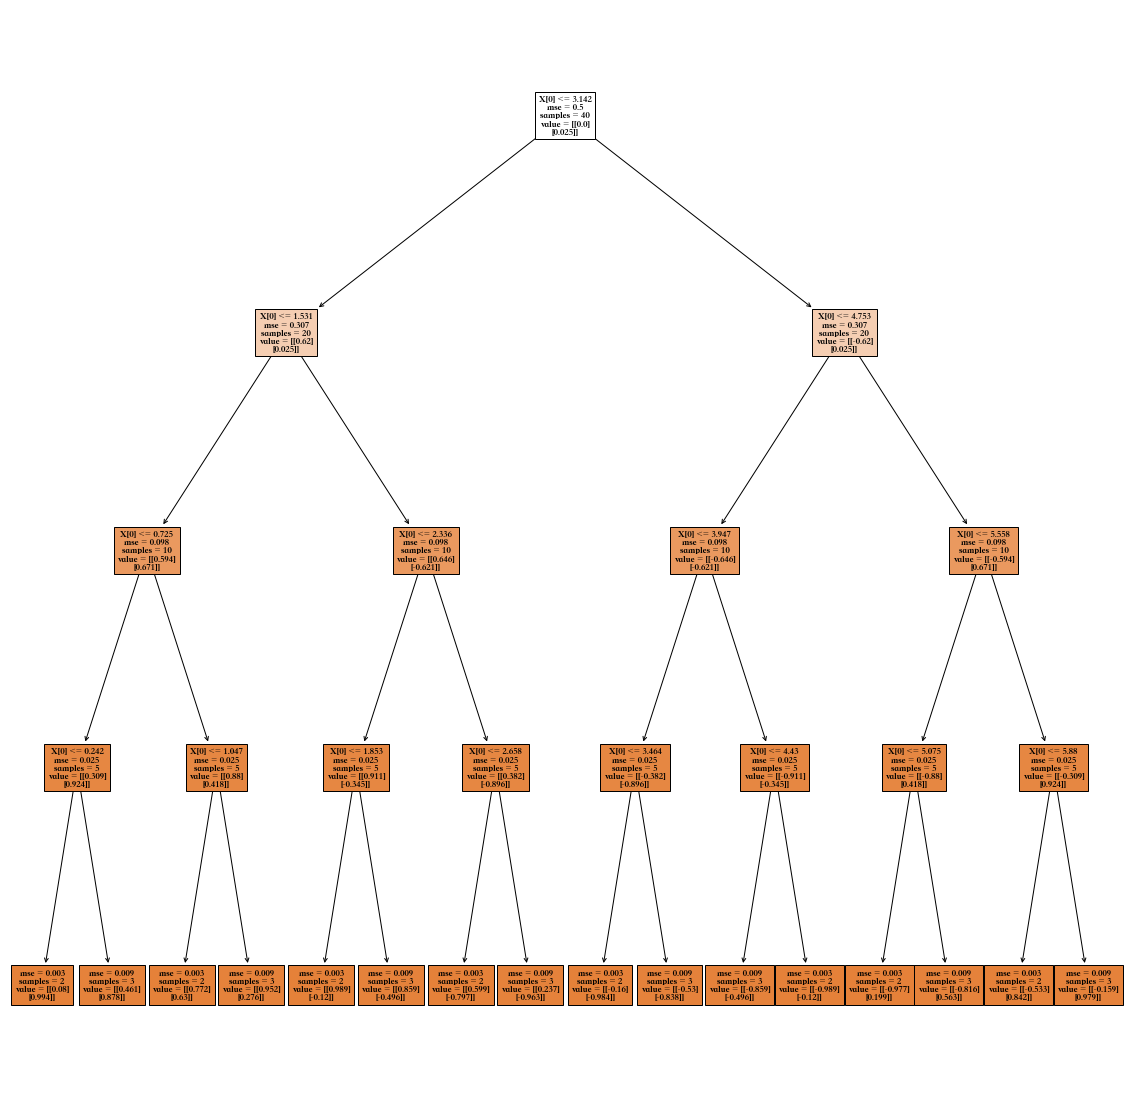

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Songti SC'
plt.figure(figsize=(20,20))

_ = tree.plot_tree(model,filled=True)

## 不进行剪枝操作，默认展开

(256, 2)

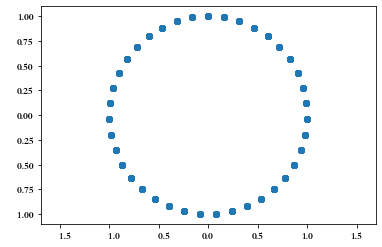

In [23]:
model = DecisionTreeRegressor(max_depth=None)
model.fit(X_train,y_train) # 建模
# y_pred.shape = ?
y_pred = model.predict(X_test) # 预测
display(y_pred.shape)
# 如果线性模型预测效果很好，绘制了测试数据，应该是：标准圆
plt.scatter(y_pred[:,0],y_pred[:,1])
_ = plt.axis('equal') # axis轴，equal 相等（横纵坐标刻度值相等）

In [24]:
model.get_depth()

6

In [25]:
X_train.shape

(40, 1)

In [26]:
# 训练数据，分纯了
model.score(X_train,y_train)

1.0

# 决策回归树原理

MSE(𝑦,𝑦̂)=1𝑛samples∑𝑖=0𝑛samples−1(𝑦𝑖−𝑦̂𝑖)2

## 未裂分时mse

In [27]:
# 注意：y_train两个列数据，进行除法操作时
((y_train - y_train.mean(axis = 0))**2).sum()/(40 * 2)

0.4996875

In [28]:
np.round(((y_train - y_train.mean(axis = 0))**2).mean(),1)

0.5

## 根节点裂分计算

In [29]:
cond = X_train[:,0] <= 3.142

X_left = X_train.reshape(-1)[cond]
X_right = X_train[:,0][~cond] # 取反操作

print('左侧分mse：',((X_left - X_left.mean(axis = 0))**2).mean())

print('右侧分mse：',((X_right - X_right.mean(axis = 0))**2).mean())

左侧分mse： 0.8630226070643552
右侧分mse： 0.8630226070643554


In [30]:
cond = X_train <= 3.142
y_left = y_train[cond.reshape(-1)]

y_right = y_train[(~cond).ravel()]

print('左侧mse：',((y_left - y_left.mean(axis = 0))**2).mean())
print('右侧mse：',((y_right - y_right.mean(axis = 0))**2).mean())

左侧mse： 0.3072588991283228
右侧mse： 0.3072588991283228


## 最佳裂分条件如何计算

In [31]:
# 最佳裂分条件是：X[0] < 3.142
# 初始值，用于记录
lower_mse = 1 # 知道最开始，mse = 0.5

best_split = {}
for i in range(len(X_train) -1):
    split = X_train[i: i +2].mean()
    
    cond = X_train <= split
    # 根据条件，得到左侧和右侧数据划分
    y_left = y_train[cond.reshape(-1)]
    y_right = y_train[(~cond).ravel()] # 平铺，一维
    
    mse_left = ((y_left - y_left.mean(axis = 0))**2).mean()
    mse_right = ((y_right - y_right.mean(axis = 0))**2).mean()
    
    # 计算划分整体的 mse
    mse_p_left = cond.sum()/cond.size
    mse_p_right = 1 - mse_p_left
    
    mse = mse_left * mse_p_left + mse_right * mse_p_right
    
    if mse < lower_mse:
        lower_mse = mse
        best_split.clear()
        best_split[np.round(split,3)] = mse
        
print('最佳的分裂条件是：',best_split)

最佳的分裂条件是： {3.142: 0.3072588991283228}


## 继续进行裂分条件计算

### 左裂分

In [32]:
# 最佳裂分条件是：X[0] < 3.142
# 初始值，用于记录
lower_mse = 1 # 知道最开始，mse = 0.5
best_split = {}

cond = X_train <= 3.142
X_train_left = X_train[cond.ravel()]
y_train_left = y_train[cond.ravel()]


for i in range(len(X_train_left) -1):
    split = X_train_left[i: i +2].mean()
    
    cond = X_train_left <= split
    # 根据条件，得到左侧和右侧数据划分
    y_left = y_train_left[cond.reshape(-1)]
    y_right = y_train_left[(~cond).ravel()] # 平铺，一维
    
    mse_left = ((y_left - y_left.mean(axis = 0))**2).mean()
    mse_right = ((y_right - y_right.mean(axis = 0))**2).mean()
    
    # 计算划分整体的mse
    mse_p_left = cond.sum()/cond.size
    mse_p_right = 1 - mse_p_left
    
    mse = mse_left * mse_p_left + mse_right * mse_p_right
    
    if mse < lower_mse:
        lower_mse = mse
        best_split.clear()
        best_split[np.round(split,3)] = mse
        
print('最佳的分裂条件是：',best_split)

最佳的分裂条件是： {1.531: 0.09834477293918131}


### 右裂分

In [33]:
# 最佳裂分条件是：X[0] < 3.142
# 初始值，用于记录
lower_mse = 1 # 知道最开始，mse = 0.5
best_split = {}

cond = X_train <= 3.142
X_train_right = X_train[(~cond).ravel()]
y_train_right = y_train[(~cond).ravel()]


for i in range(len(X_train_right) -1):
    split = X_train_right[i: i +2].mean()
    
    cond = X_train_right <= split
    # 根据条件，得到左侧和右侧数据划分
    y_left = y_train_right[cond.reshape(-1)]
    y_right = y_train_right[(~cond).ravel()] # 平铺，一维
    
    mse_left = ((y_left - y_left.mean(axis = 0))**2).mean()
    mse_right = ((y_right - y_right.mean(axis = 0))**2).mean()
    
    # 计算划分整体的mse
    mse_p_left = cond.sum()/cond.size
    mse_p_right = 1 - mse_p_left
    
    mse = mse_left * mse_p_left + mse_right * mse_p_right
    
    if mse < lower_mse:
        lower_mse = mse
        best_split.clear()
        best_split[np.round(split,3)] = mse
        
print('最佳的分裂条件是：',best_split)

最佳的分裂条件是： {4.753: 0.09834477293918137}
